In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import cmath

In [2]:
energy_a = [None]*5
meanT_a = [None]*5
energy = [None]*5

In [3]:
# energy
total = 95
start = 5
end = 7
skipfooter = total-end
energy_a[0] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 12
end = 18
skipfooter = total-end
meanT_a[0] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 24
end = 26
skipfooter = total-end
energy_a[1] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 31
end = 37
skipfooter = total-end
meanT_a[1] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 43
end = 45
skipfooter = total-end
energy_a[2] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 50
end = 56
skipfooter = total-end
meanT_a[2] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 62
end = 64
skipfooter = total-end
energy_a[3] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 69
end = 75
skipfooter = total-end
meanT_a[3] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 81
end = 83
skipfooter = total-end
energy_a[4] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 88
end = 94
skipfooter = total-end
meanT_a[4] = pd.read_csv("./forma21a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

In [4]:
# energy
total = 21
start = 5
end = 7
skipfooter = total-end
energy[0] = pd.read_csv("./forma21b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 12
end = 14
skipfooter = total-end
energy[1] = pd.read_csv("./forma21b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 19
end = 21
skipfooter = total-end
energy[2] = pd.read_csv("./forma21b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

In [6]:
print(meanT_a[2])

  INTITULE    RESU NOM_CHAM  NUME_ORDRE  INST       TEMP  QUANTITE
0   mean_T  resT_2     TEMP           0   0.0  173.58600  MOMENT_0
1   mean_T  resT_2     TEMP           0   0.0   -1.41885  MOMENT_1
2   mean_T  resT_2     TEMP           0   0.0  107.20000   MINIMUM
3   mean_T  resT_2     TEMP           0   0.0  231.92200   MAXIMUM
4   mean_T  resT_2     TEMP           0   0.0  174.29500  MOYE_INT
5   mean_T  resT_2     TEMP           0   0.0  172.87600  MOYE_EXT


In [7]:
# Reference values after four uniform remeshing runs on TRIA3
ener_ref_a  = -2016.80291
meanT_ref_a = 170.2

# Reference values after four uniform remeshing runs on TRIA6
ener_ref =  6.75073756E-5

In [8]:
# Initialization of Python lists
energy_vs_refine_a     = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
err_energy_vs_refine_a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
meanT_vs_refine_a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
err_meanT_vs_refine_a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

energy_vs_refine     = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
err_energy_vs_refine = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
energy_mat_a     = np.zeros((len(energy_vs_refine_a), 2))
err_energy_mat_a = np.zeros((len(err_energy_vs_refine_a), 2))
meanT_mat_a      = np.zeros((len(meanT_vs_refine_a), 2))
err_meanT_mat_a  = np.zeros((len(err_meanT_vs_refine_a), 2))

energy_mat     = np.zeros((len(energy_vs_refine), 2))
err_energy_mat = np.zeros((len(err_energy_vs_refine), 2))

In [10]:
for i in range(len(energy_vs_refine)) :
    energy_mat_a[i][0]     = i
    err_energy_mat_a[i][0] = i
    meanT_mat_a[i][0]      = i
    err_meanT_mat_a[i][0]  = i
    
    energy_mat_a[i][1]     = 0.0
    err_energy_mat_a[i][1] = 0.0
    meanT_mat_a[i][1]      = 0.0
    err_meanT_mat_a[i][1]  = 0.0
    
    energy_mat[i][0]     = i
    err_energy_mat[i][0] = i

    energy_mat[i][1]     = 0.0
    err_energy_mat[i][1] = 0.0

In [31]:
print(meanT_a[0][:1])

  INTITULE    RESU NOM_CHAM  NUME_ORDRE  INST     TEMP  QUANTITE
0   mean_T  resT_0     TEMP           0   0.0  178.365  MOMENT_0


In [33]:
for num_calc in np.arange(0,5):
    energy_mat_a[num_calc][1] = energy_a[num_calc]['TOTALE']/1000
    err_energy_mat_a[num_calc][1] = abs((energy_mat_a[num_calc][1]-ener_ref_a)/ener_ref_a)*100
    meanT_mat_a[num_calc][1] = meanT_a[num_calc][:1]['TEMP']
    err_meanT_mat_a[num_calc][1] = abs((meanT_mat_a[num_calc][1]-meanT_ref_a)/meanT_ref_a)*100
for num_calc in np.arange(0,3):
    energy_mat[num_calc][1] = energy[num_calc]['TOTALE']
    err_energy_mat[num_calc][1] = abs((energy_mat[num_calc][1] - ener_ref)/ener_ref)*100

In [34]:
print(meanT_mat_a)

[[  0.    178.365]
 [  1.    173.812]
 [  2.    173.586]
 [  3.    174.528]
 [  4.    170.272]
 [  5.      0.   ]
 [  6.      0.   ]
 [  7.      0.   ]]


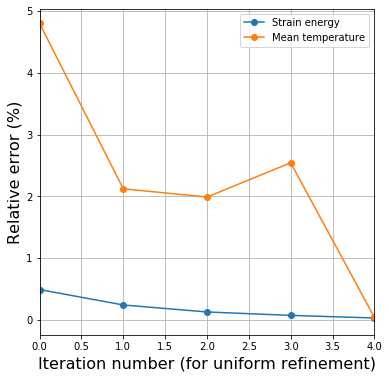

In [36]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(err_energy_mat_a[:,0], err_energy_mat_a[:,1], 'C0-o', label='Strain energy')
plt.plot(err_meanT_mat_a[:,0], err_meanT_mat_a[:,1], 'C1-o', label='Mean temperature')
plt.xlabel('Iteration number (for uniform refinement)', fontsize=16)
plt.ylabel('Relative error (%)', fontsize=16)
plt.grid(True)
ax.set_xlim([0, 4])
#ax.set_ylim([0, 120])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma21a_8.svg')

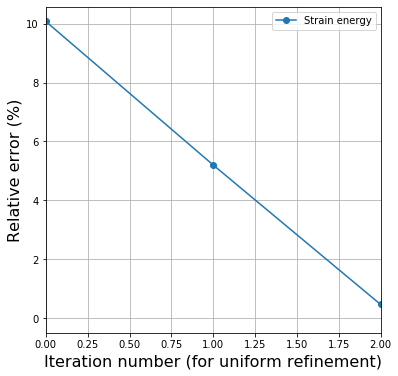

In [14]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(err_energy_mat[:,0], err_energy_mat[:,1], 'C0-o', label='Strain energy')
plt.xlabel('Iteration number (for uniform refinement)', fontsize=16)
plt.ylabel('Relative error (%)', fontsize=16)
plt.grid(True)
ax.set_xlim([0, 2])
#ax.set_ylim([0, 120])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma21b_8.svg')